### Stock price history of two media companies in S&P 500: 
#### Netflix (NFLX) and The Walt Disney Company (DIS)

In [13]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import norm
from scipy.optimize import minimize
#https://towardsdatascience.com/downloading-historical-stock-prices-in-python-93f85f059c1f

In [2]:
start = datetime(2021,11,18)
end = datetime(2022,11,18)

### Netflix

In [3]:
nflx_final = pd.DataFrame()
nflx = []
nflx = yf.download('NFLX', start=start, end=end, progress=False)
nflx_final = nflx_final.append(nflx,sort=False)
nflx_final

C:\Users\anush\AppData\Local\Temp\ipykernel_3088\2237142170.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nflx_final = nflx_final.append(nflx,sort=False)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-18,691.609985,691.739990,679.739990,682.020020,682.020020,2012900
2021-11-19,692.349976,694.159973,675.000000,678.799988,678.799988,2613700
2021-11-22,676.020020,679.479980,656.469971,659.200012,659.200012,2764400
2021-11-23,658.179993,666.429993,646.049988,654.059998,654.059998,2320200
2021-11-24,658.010010,661.440002,651.099976,658.289978,658.289978,1867300
...,...,...,...,...,...,...
2022-11-11,274.470001,290.660004,271.559998,290.130005,290.130005,9567300
2022-11-14,290.000000,311.000000,288.190002,299.269989,299.269989,17978200
2022-11-15,309.200012,312.709991,302.549988,310.200012,310.200012,14626900


### The Walt Disney Company

In [4]:
dis_final = pd.DataFrame()
dis = []
dis = yf.download('DIS', start=start, end=end, progress=False)
dis_final = dis_final.append(dis,sort=False)
dis_final

C:\Users\anush\AppData\Local\Temp\ipykernel_3088\3263549175.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dis_final = dis_final.append(dis,sort=False)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-18,157.089996,157.300003,153.710007,155.580002,155.580002,14487700
2021-11-19,155.020004,155.210007,152.770004,154.000000,154.000000,16776500
2021-11-22,153.229996,155.820007,152.570007,154.160004,154.160004,12790400
2021-11-23,153.839996,154.250000,150.190002,151.029999,151.029999,17382900
2021-11-24,150.690002,151.410004,148.800003,151.339996,151.339996,14123700
...,...,...,...,...,...,...
2022-11-11,91.580002,95.580002,91.099998,95.010002,95.010002,22320900
2022-11-14,95.849998,96.620003,94.209999,94.279999,94.279999,20598000
2022-11-15,96.000000,97.180000,93.699997,95.510002,95.510002,15801900


### Stock price comparison

In [93]:
nflx_vs_dis = pd.DataFrame()
nflx_vs_dis['NFLX_close'] = nflx_final['Close']
nflx_vs_dis['DIS_close'] = dis_final['Close']
nflx_vs_dis

,NFLX_close,DIS_close
Date,,
2021-11-18,682.020020,155.580002
2021-11-19,678.799988,154.000000
2021-11-22,659.200012,154.160004
2021-11-23,654.059998,151.029999
2021-11-24,658.289978,151.339996
...,...,...
2022-11-11,290.130005,95.010002
2022-11-14,299.269989,94.279999
2022-11-15,310.200012,95.510002


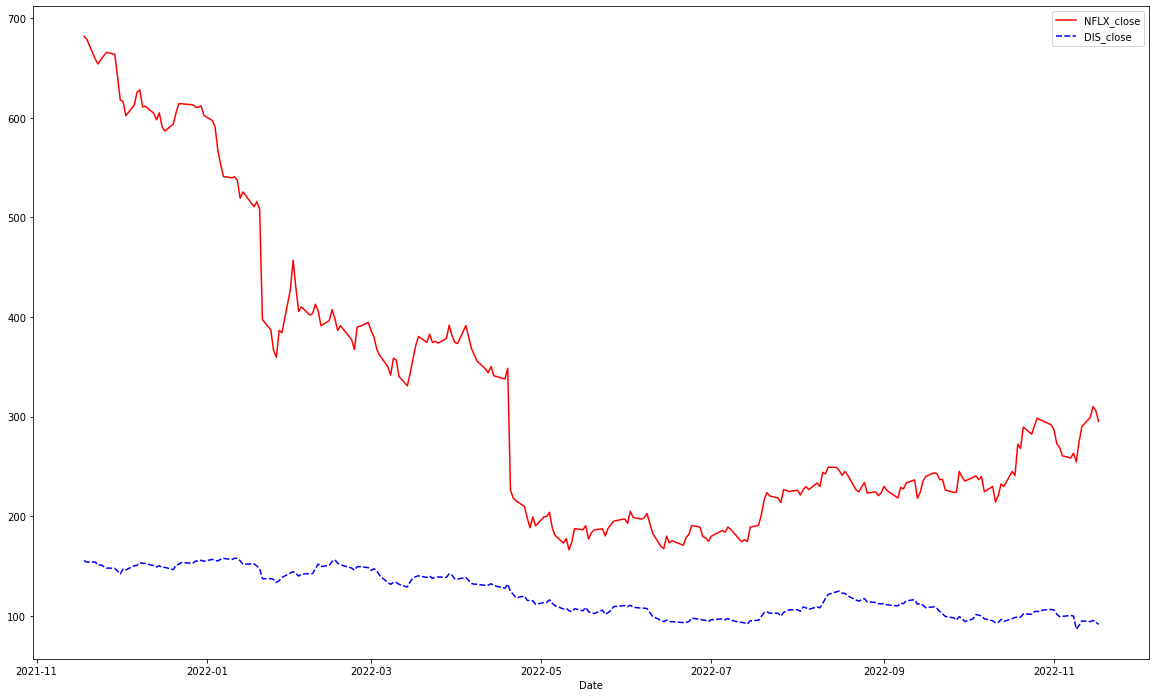

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize = (20,12)) 
sns.lineplot(data = nflx_vs_dis, palette=['r', 'b'])
plt.show()

### Put option comparison

In [16]:
#NFLX
#Jan 2023 maturity
maturity = '01/20/2023'
maturity = datetime.strptime(maturity, '%m/%d/%Y')

nflx_put = yf.Ticker('NFLX230120C00280000')
nflx_opt = nflx_put.history()
nflx_opt = nflx_opt.reset_index()
nflx_opt['Date'] = pd.to_datetime(nflx_opt['Date']).dt.tz_convert(None)

nflx_opt['toMature'] = maturity -  nflx_opt['Date']
nflx_opt['toMature'] =  nflx_opt['toMature'].dt.days/365.25

nflx_opt.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,toMature
0,2022-11-03 04:00:00,25.219999,26.299999,23.900000,23.900000,1397,0,0,0.210815
1,2022-11-04 04:00:00,22.650000,22.650000,16.400000,18.200001,2596,0,0,0.208077
2,2022-11-07 05:00:00,16.700001,17.400000,14.850000,17.400000,2085,0,0,0.199863
3,2022-11-08 05:00:00,18.100000,20.400000,16.799999,18.600000,618,0,0,0.197125
4,2022-11-09 05:00:00,16.260000,16.600000,16.000000,16.450001,347,0,0,0.194387


In [17]:
#DISNEY
maturity = '01/20/2023'
maturity = datetime.strptime(maturity, '%m/%d/%Y')

dis_put = yf.Ticker('DIS221209C00090000')
dis_opt = dis_put.history()
dis_opt = dis_opt.reset_index()
dis_opt['Date'] = pd.to_datetime(dis_opt['Date']).dt.tz_convert(None)

dis_opt['toMature'] = maturity -  dis_opt['Date']
dis_opt['toMature'] =  dis_opt['toMature'].dt.days/365.25

dis_opt.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,toMature
0,2022-11-07 05:00:00,12.10,12.10,12.10,12.10,1,0,0,0.199863
1,2022-11-08 05:00:00,13.46,13.46,11.25,11.25,3,0,0,0.197125
2,2022-11-09 05:00:00,3.50,3.75,2.22,2.39,39708,0,0,0.194387
3,2022-11-10 05:00:00,3.50,3.86,2.40,3.85,34799,0,0,0.191650
4,2022-11-11 05:00:00,4.10,7.00,4.10,6.80,1170,0,0,0.188912


In [18]:
nflx_opt_dis = pd.DataFrame()
nflx_opt_dis['NFLX_close'] = nflx_opt['Close']
nflx_opt_dis['DIS_close'] = dis_opt['Close']
#nflx_opt_dis

### Options prices

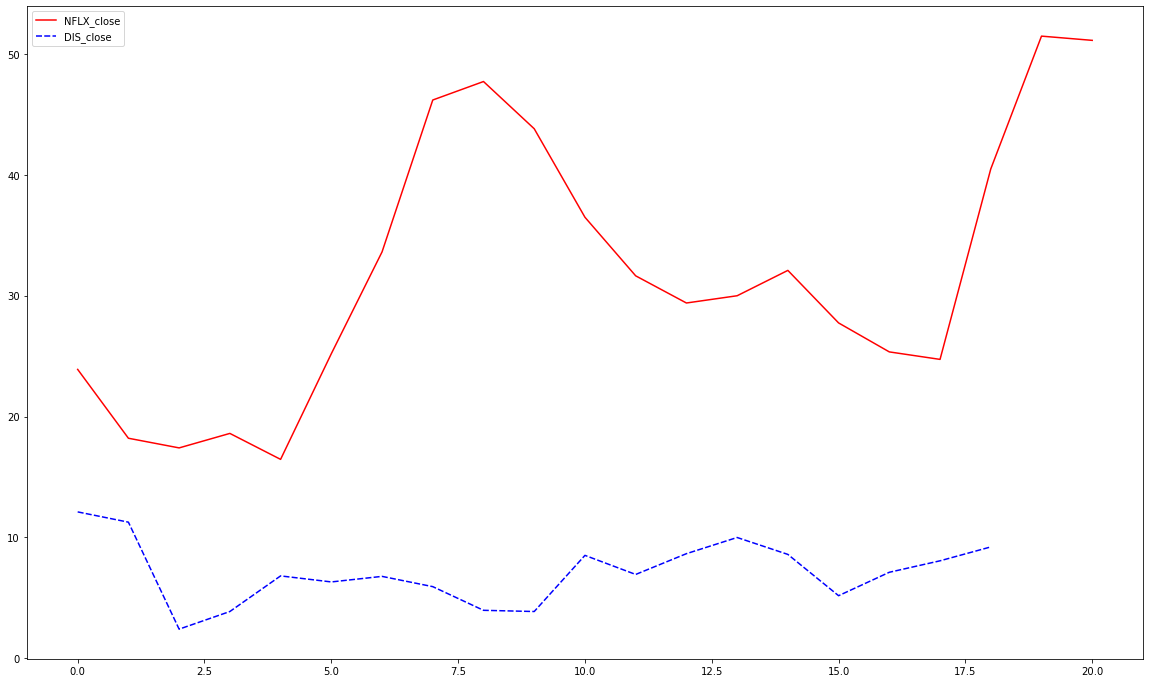

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize = (20,12)) 
sns.lineplot(data = nflx_opt_dis, palette=['r', 'b'])
plt.show()

### Volume options

In [20]:
opt_vol = pd.DataFrame()
opt_vol['NFLX_volume'] = nflx_opt['Volume']
opt_vol['DIS_volume'] = dis_opt['Volume']
opt_vol.head()

,NFLX_volume,DIS_volume
0,1397,1.0
1,2596,3.0
2,2085,39708.0
3,618,34799.0
4,347,1170.0


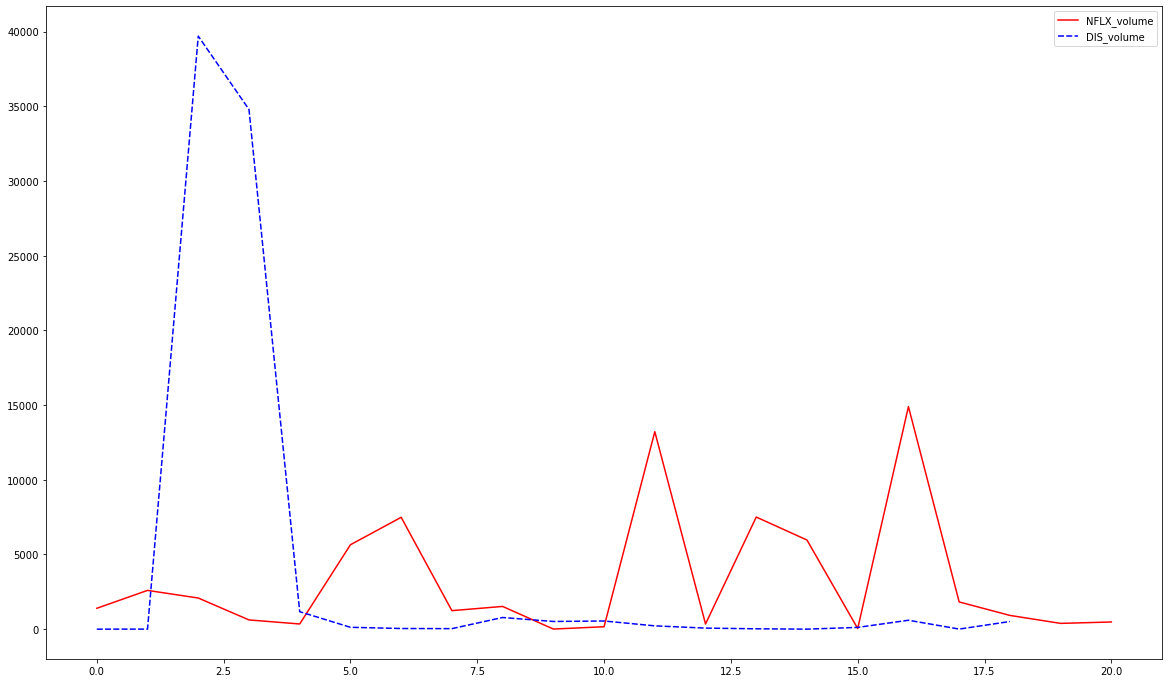

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize = (20,12)) 
sns.lineplot(data = opt_vol, palette=['r', 'b'])
plt.show()

# ----------------
## Black-Scholes Model for Netflix

In [136]:
#Black Scholes - for multiple options
class stockObj:

    def getStockData(stock):
        stock_history = stock.history()
        stock_history = stock_history.reset_index()
        stock_history['Date'] = pd.to_datetime(stock_history['Date']).dt.tz_convert(None)
        stock_history['toMature'] = maturity - stock_history['Date']
        stock_history['toMature'] =  stock_history['toMature'].dt.days/365.25
        return stock_history

    def getVolatility(stock, stock_history=None):
        if stock_history is None:
            stock_history = stockObj.getStockData(stock) 
        stock_history = stockObj.getStockData(stock)
        vol = np.std(stock_history['Close']) * (stock_history.shape[0]/365)
        return vol

    def getCallPrices(stock, K, r, stock_history=None):
        call_prices = []
        stock_data = stock_history
        if stock_data is None:
            stock_data = stockObj.getStockData(stock)
        for cl, d in zip(stock_data['Close'], stock_data['toMature']):
            call_prices.append(blackScholes().call_option(cl, d, K, r, stockObj.getVolatility(stock)))
        return call_prices

    def getMarketCallOptionPrices(opr):
        call = opr.history()
        call = call.reset_index()
        call['Date'] = pd.to_datetime(call['Date']).dt.tz_localize(None)
        call['toMature'] = maturity - call['Date']
        call['toMature'] =  call['toMature'].dt.days/365.25
        return call

    def getCallVsMarketData(stock, stock_prices_data, market_call_prices, stock_history=None,):
        call_vs_market = pd.DataFrame(stock_prices_data, columns = ['Price-BS'])
        call_vs_market['Price-Market'] = market_call_prices['Close']
        call_vs_market['Date'] = market_call_prices['Date']
        return call_vs_market    

In [ ]:
NFLX = yf.Ticker('NFLX')
opt = NFLX.option_chain(date = '2022-12-09')
opt_calls = pd.DataFrame(opt.calls)
#opt_calls.sort_values(by = 'openInterest', ascending = False) #To choose the options with most open intersts

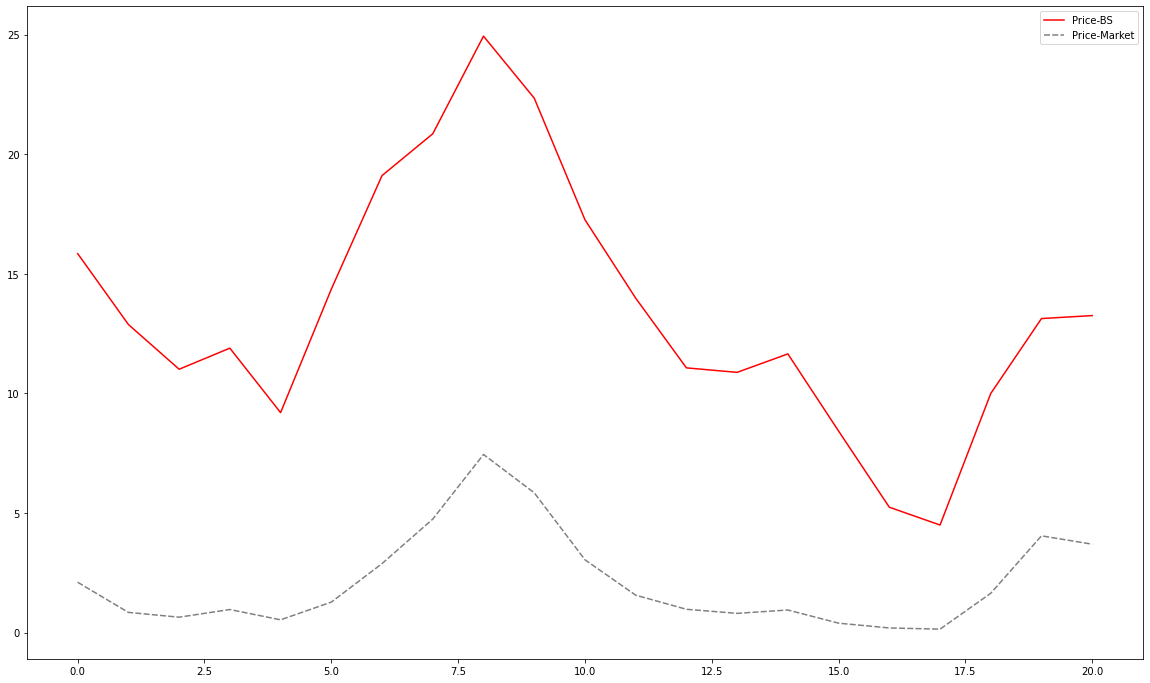

In [139]:
NFLX = yf.Ticker('NFLX')
NFLX_stock_history = stockObj.getStockData(NFLX)
NFLX_call_prices = stockObj.getCallPrices(NFLX, 330, 0.003527, NFLX_stock_history)
NFLX_market_call_prices = stockObj.getMarketCallOptionPrices(yf.Ticker('NFLX221209C00330000')) 
NFLX_call_vs_market = stockObj.getCallVsMarketData(NFLX, NFLX_call_prices, NFLX_market_call_prices)

plt.figure(figsize = (20,12)) 
sns.lineplot(data = NFLX_call_vs_market,  palette=['r', 'grey'])
plt.show()

# ----------------
## Black-Scholes Model for DISNEY

#### Choosing Disney to compare against Netflix

In [5]:
DIS = yf.Ticker('DIS')
opt = DIS.option_chain(date = '2022-12-09')
opt_calls = pd.DataFrame(opt.calls)
#opt_calls.sort_values(by = 'openInterest', ascending = False) #To choose the options with most open intersts


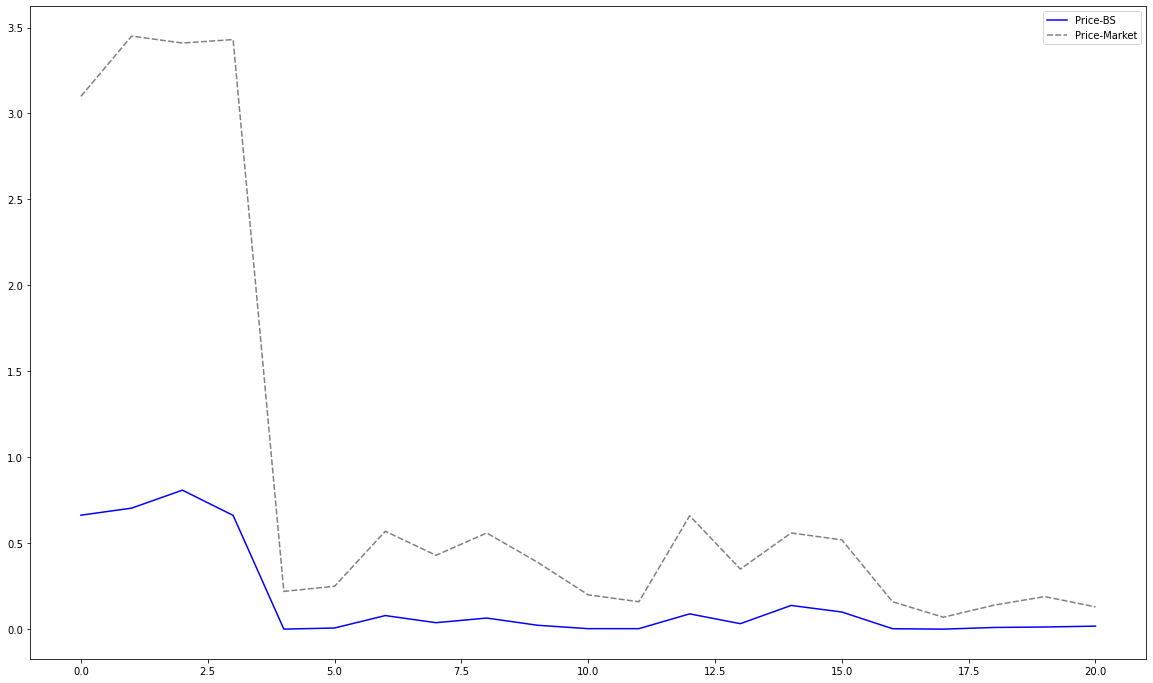

In [120]:
DIS = yf.Ticker('DIS')
DIS_stock_history = stockObj.getStockData(DIS)
DIS_call_prices = stockObj.getCallPrices(DIS, 105, 0.003527, DIS_stock_history)
DIS_market_call_prices = stockObj.getMarketCallOptionPrices(yf.Ticker('DIS221209C00105000')) 
DIS_call_vs_market = stockObj.getCallVsMarketData(DIS, DIS_call_prices, DIS_market_call_prices)

plt.figure(figsize = (20,12)) 
sns.lineplot(data = DIS_call_vs_market,  palette=['b', 'grey'])
plt.show()